In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker

In [3]:
erp4k = pd.read_csv('/home/sepal-user/CAFI_DDD/erp4k.csv', delimiter=';', encoding='latin-1')

In [4]:
erp4k.head(2)

,ï»¿53747,-7.23864009182039,7.52948470572773,0.0579206349206349,1,690,mesophile,1.1,40,Etablissement humain,...,4040.2,4040.3,Stable Non Forest,Stable Non Forest.1,Stable Non Forest.2,Stable Non Forest.3,NA,2,Doute pour CHG_20_21,FAUX
0,7919,-8.023322,6.806102,0.035647,1,326.0,mesophile,1,50,Terres gramineennes,...,5050,5050,Stable Non Forest,Stable Non Forest,Stable Non Forest,Stable Non Forest,NaN,1,NaN,FAUX
1,11468,-7.921900,6.688551,0.023333,1,2456.0,mesophile,1,21,Terres cultivees,...,2121,2121,Stable Non Forest,Stable Non Forest,Stable Non Forest,Stable Non Forest,NaN,2,NaN,FAUX


In [8]:
len(pts4k)


4000

In [ ]:
# Freeze the id point_id into 



chg_yr_1520
chg_1520
ocs_2015
ocs_2020
point_id

In [9]:
pts4k.dtypes

point_id            float64
LON                 float64
LAT                 float64
prob_chang          float64
str_dal_ne            int64
ID                  float64
phyto                object
str_dal_FA            int64
INT1_2000_n1         object
INT1_2000_n2         object
INT1_2010_n1         object
INT1_2010_n2         object
INT1_2015_n1         object
INT1_2015_n2         object
INT1_2020_n1         object
INT1_2020_n2         object
INT1_2021_n1         object
INT1_2021_n2         object
CHG_00_10             int64
CHG_10_15             int64
CHG_15_20             int64
CHG_20_21             int64
Transition_00_10     object
Transition_10_15     object
chg_1520             object
Transition_20_21     object
Gain_Cohort          object
IC                    int64
COMMENT              object
Wetlands               bool
kmeans                int64
chg_yr_1520         float64
dtype: object

In [9]:
# Create new columns for def_year and deg_year for each point_id using the column chg_yr_1520. def_year and deg_year should only be from 2015 to 2020

# Function to set the year only if it is between 2015 and 2020
def set_year_if_valid(year):
    return year if 2015 <= year <= 2020 else None

# Create the new columns based on the 'chg_yr_1520' column
pts835['def_year'] = pts835['chg_yr_1520'].apply(set_year_if_valid)
pts835['deg_year'] = pts835['chg_yr_1520'].apply(set_year_if_valid)


In [ ]:
# Display the new columns along with the 'chg_yr_1520' column to verify the results
pts4k[['point_id', 'chg_yr_1520', 'def_year', 'deg_year']].head()


In [11]:
# Convert 'chg_yr_1520' and 'point_id' columns to Int64
pts835['chg_yr_1520'] = pts835['chg_yr_1520'].astype('Int64')
pts835['deg_year2018'] = pts835['deg_year2018'].astype('Int64')
pts835['def_year2019'] = pts835['def_year2019'].astype('Int64')
pts835['deg_year2019'] = pts835['deg_year2019'].astype('Int64')
pts835['def_year2020'] = pts835['def_year2020'].astype('Int64')
pts835['deg_year2020'] = pts835['deg_year2020'].astype('Int64')
   


# Display the data types of the updated columns to verify the changes
pts835[['chg_yr_1520', 'point_id']].dtypes



chg_yr_1520    Int64
point_id       int64
dtype: object

In [12]:
pts835.dtypes

point_id        int64
fid             int64
index           int64
images          int64
mon_images      int64
                ...  
deg_year2018    Int64
def_year2019    Int64
deg_year2019    Int64
def_year2020    Int64
deg_year2020    Int64
Length: 180, dtype: object

In [16]:
# Define the columns to change data type
new_type = ['def_year', 'deg_year', 'chg_yr_1520', 'point_id','kmeans' ]

# change the data type to int64
for column in new_type:
    pts835[column] = pts835[column].astype('Int64')

In [19]:
# Define the range of years to be considered
years_range = range(2015, 2021)

In [31]:
# Create new columns for def_year and deg_year
for year in years_range:
    pts835[f'def_year{year}'] = pts835['def_year'].apply(lambda y: 1 if str(year) in str(y).split(',') else 0)
    pts835[f'deg_year{year}'] = pts835['deg_year'].apply(lambda y: 1 if str(year) in str(y).split(',') else 0)


In [38]:
# Create new columns for def_year and deg_year
for year in years_range:
    pts835[f'gain_year{year}'] = pts835['chg_yr_1520'].apply(lambda y: 1 if str(year) in str(y).split(',') else 0)

In [39]:
 pts835.head(5)

,point_id,fid,index,images,mon_images,bfast_chan,bfast_magn,bfast_mean,cusum_chan,cusum_conf,...,deg_year2019,def_year2020,deg_year2020,CNC,gain_year2015,gain_year2016,gain_year2017,gain_year2018,gain_year2019,gain_year2020
0,144804,16,141183,117,48,-1.000,0.000000,0.000000,2018.110,0.016382,...,0,0,0,0,0,0,0,0,0,0
1,81378,33,27038,122,51,2019.290,555.863647,1.133991,2017.033,0.315303,...,0,0,0,0,0,0,0,0,0,0
2,81984,34,26770,120,55,-1.000,0.000000,0.000000,2020.937,0.384688,...,0,0,0,0,0,0,0,0,0,0
3,93956,35,26941,117,52,-1.000,0.000000,0.000000,2019.468,0.133678,...,0,0,0,0,0,0,0,0,0,0
4,100390,36,25418,140,62,2016.315,-162.680954,0.369152,2018.066,0.593855,...,0,0,0,0,0,0,0,0,0,0


In [24]:
points_strata_deg = pd.pivot_table(pts835, values = 'point_id', index = 'deg_year',columns = 'kmeans', aggfunc =  "count")
points_strata_deg

kmeans,0,1,2
deg_year,,,
2016,4.0,NaN,2.0
2017,3.0,NaN,NaN
2018,1.0,NaN,2.0
2019,2.0,1.0,4.0
2020,10.0,NaN,4.0


In [ ]:
points_strata_gain = pd.pivot_table(pts835, values = 'point_id', index = 'gain_year',columns = 'kmeans', aggfunc =  "count")
points_strata_gain

In [36]:
points_strata_def = pd.pivot_table(pts835, values = 'point_id', index = 'chg_1520',columns = 'kmeans', aggfunc =  "count")
points_strata_def

kmeans,0,1,2
chg_1520,,,
Deforestation,8.0,1.0,3.0
Degradation,NaN,NaN,3.0
Gain,1.0,NaN,NaN
Stable,NaN,7.0,NaN


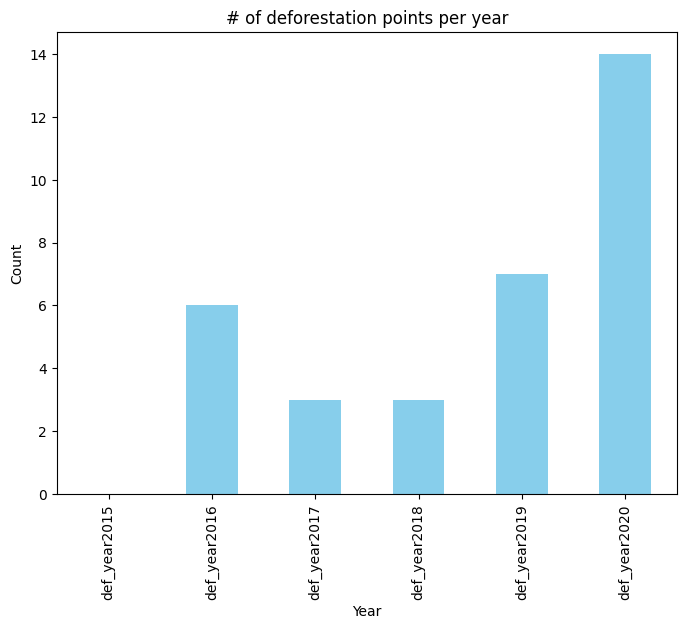

In [26]:
#select the values you want to plot
values_to_plot = ['def_year2015', 'def_year2016','def_year2017','def_year2018','def_year2019','def_year2020']

# Initialize a dictionary to hold the counts for each year
def_value_counts = {year: (pts835[year] == 1).sum() for year in values_to_plot}

# Convert to a Series for plotting
def_value_counts_series = pd.Series(def_value_counts)

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
def_value_counts_series.plot(kind='bar', color='skyblue')

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('# of deforestation points per year')

# Show the plot
plt.show()

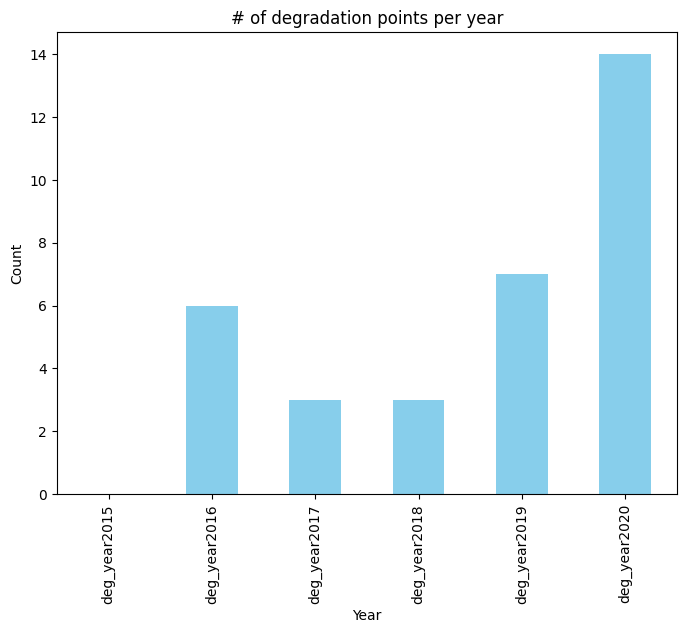

In [27]:
#select the values you want to plot
values_to_plot = ['deg_year2015', 'deg_year2016','deg_year2017','deg_year2018','deg_year2019','deg_year2020']

# Initialize a dictionary to hold the counts for each year
def_value_counts = {year: (pts835[year] == 1).sum() for year in values_to_plot}

# Convert to a Series for plotting
def_value_counts_series = pd.Series(def_value_counts)

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
def_value_counts_series.plot(kind='bar', color='skyblue')

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('# of degradation points per year')

# Show the plot
plt.show()

In [33]:
pts835['CNC'] = pts835['chg_1520'].apply(lambda x: 1 if x in ['Gain', 'Degradation', 'Deforestation'] else 0)

In [41]:
# Save the updated DataFrame to a new CSV file
pts835.to_csv('/home/sepal-user/CAFI_DDD/835_test.csv', index=False, sep=';')